In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
feature_names = ['Frequency','Angle','Chord Length','velocity','displacement thickness','sound pressure']
airfoil = pd.read_csv("./airfoil_self_noise.csv",header=None,sep='\t',names=feature_names)

In [3]:
airfoil.head()

,Frequency,Angle,Chord Length,velocity,displacement thickness,sound pressure
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


In [4]:
airfoil = pd.DataFrame(airfoil)
airfoil.head()

,Frequency,Angle,Chord Length,velocity,displacement thickness,sound pressure
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


In [5]:
frequency = pd.Series(airfoil['Frequency'])
frequency.value_counts().sort_values()

20000      6
16000     13
12500     25
200       35
250       42
10000     42
8000      52
315       56
400       69
500       78
630       88
6300      89
5000      95
800       97
1000      99
1250     100
4000     102
1600     103
3150     103
2500     104
2000     105
Name: Frequency, dtype: int64

In [6]:
data = pd.DataFrame(airfoil)
data.nunique()  # no. of unique values of each feature

Frequency                   21
Angle                       27
Chord Length                 6
velocity                     4
displacement thickness     105
sound pressure            1456
dtype: int64

In [7]:
corelation = airfoil.corr('pearson') 

In [8]:
corelation['sound pressure'].sort_values()

Frequency                -0.390711
displacement thickness   -0.312670
Chord Length             -0.236162
Angle                    -0.156108
velocity                  0.125103
sound pressure            1.000000
Name: sound pressure, dtype: float64

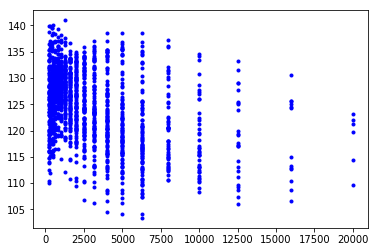

In [9]:
x= airfoil['Frequency']
y = airfoil['sound pressure']
plt.plot(x,y,'b.')

In [10]:
x = (x - x.min())/(x.max()-x.min())
y = (y - y.min())/(y.max()-y.min())

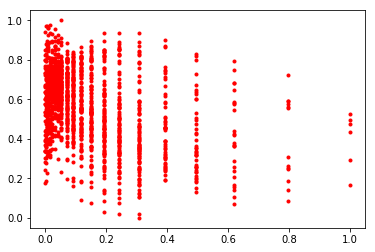

In [11]:
plt.plot(x,y,'r.')

In [12]:
x= np.array(x)
y = np.array(y)

In [13]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [14]:
x_train.size

1202

In [15]:
len(x_test)

301

In [16]:
def hypothesis(a,x,b):
    return a*x +b

In [17]:
def error(a,x,b,y):
    e = 0
    m = len(x)
    
    for i in range(m):
        e += np.power((hypothesis(a,x[i],b)-y[i]),2)
    return (1/(2*m))*e

In [18]:
def step_gradient(a,x,b,y,learning_rate):
    grad_a = 0
    grad_b = 0
    m = len(x)
    
    for i in range(m):
        grad_a += (1/m)*(hypothesis(a, x[i],b) - y[i])*x[i]  #partial differentiation
        grad_b += (1/m)*(hypothesis(a, x[i],b) - y[i])
        
    a = a - grad_a * learning_rate
    b = b - grad_b * learning_rate
    
    return a,b

In [19]:
def descend(init_a,x,init_b,y,learning_rate,iterations):
    a = init_a
    b= init_b
    
    for i in range(iterations):
        e = error(a,x,b,y)
        
        if i % 1000 ==0:
            print(f"Error: {np.sqrt(e)}, a:{a}, b:{b}")
            
        a,b = step_gradient(a,x,b,y,learning_rate)
    
    return a,b

In [20]:
#  a                      b                    error                 accuracy(test)       l-rate   iteration
#  a = 0,                 b=0,                 0.1257600730118208,   -,                   0.001,   10000
# -0.02849951021584285,   0.5777301399428584,  0.12242922254612959,  -,                   0.001,   10000
# -0.11377402048918804,   0.5895293516584522,  0.11616014762226655,  0.8682777154698321,  0.001,   10000
# -0.4246712917195324,    0.6323298334317525,  0.11607631925650443,  0.8681108644416629,  0.1,     10000
# -0.4246712917195324,    0.6323298334317525,  0.1160884256376533,   0.8681864622187847,  0.01,    5000
# -0.4246712917195324,    0.6323298334317525,  0.1161097607808423,   0.8682506090342434,  0.001,   20000
# -0.43931603105497125,   0.6343459392844063,  0.11608965829411803,  0.8682065465150453,   ",      "
# -0.44856476019242486,   0.6356191894609058,  0.1160816396080158,   0.8681742520984771,   ",       "
# -0.4544056965654589,    0.6364232970477259,  0.11607716558838066,  0.8681367473970876,  0.002,   20000

In [21]:
a = -0.4641770474099414
b = 0.6319108640652995
learning_rate = 0.004
iterations = 20000

In [22]:
final_a,final_b = descend(a,x_train,b,y_train,learning_rate,iterations)

Error: 0.11913667649001063, a:-0.4641770474099414, b:0.6319108640652995
Error: 0.11912499479971471, a:-0.46165827125191705, b:0.6332294270615161
Error: 0.11912039202088244, a:-0.45958174685907943, b:0.6329644231563433
Error: 0.11911661315367247, a:-0.4577033769560507, b:0.6326997314390012
Error: 0.11911350957789817, a:-0.4560011777353037, b:0.6324594444347704
Error: 0.11911096063040562, a:-0.4544585745361955, b:0.6322416793661347
Error: 0.11910886720454907, a:-0.4530606029699401, b:0.6320443314302294
Error: 0.11910714790018201, a:-0.45179370262658497, b:0.6318654864690144
Error: 0.11910573586113461, a:-0.4506455845109695, b:0.6317034096798027
Error: 0.11910457617723817, a:-0.44960511182160007, b:0.631556528909905
Error: 0.11910362375021628, a:-0.4486621919228565, b:0.6314234194087195
Error: 0.11910284154068695, a:-0.4478076784459231, b:0.6313027900076184
Error: 0.1191021991282631, a:-0.44703328256857155, b:0.6311934705955542
Error: 0.11910167152885977, a:-0.4463314926131775, b:0.631094

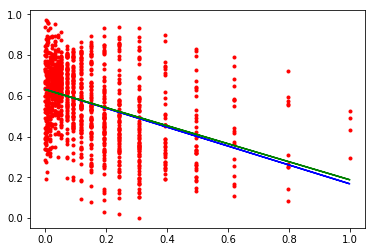

In [23]:
plt.plot(x_train,y_train,'r.',
         x_train,hypothesis(a,x_train,b),'b',
         x_train,hypothesis(final_a,x_train,final_b),'g')

In [24]:
final_a,final_b

(-0.4429534396025505, 0.6306175299850656)

In [25]:
x_test[:3]

array([0.01515152, 0.19191919, 0.09090909])

In [26]:
y_test[:3]                             

array([0.62368708, 0.32587018, 0.78543888])

In [27]:
hypothesis(final_a,x_test[:3],final_b)          

array([0.62390611, 0.54560626, 0.59034904])

In [28]:
error = np.sqrt(error(final_a,x_test,final_b,y_test))
error

0.12041707389883419

In [29]:
1 - error

0.8795829261011658